In [1]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load


%matplotlib inline

In [2]:
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             classification_report,
                             confusion_matrix,
                             roc_curve,
                             auc,
                             roc_auc_score,
                             precision_recall_curve,
                             f1_score)

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [6]:
df['not.fully.paid'].isnull().mean()

0.0

In [4]:
df1=pd.get_dummies(df, columns=['purpose'])

In [5]:
df1['log.annual.inc'] = np.exp(df1['log.annual.inc'])

In [9]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.000385,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.000073,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.999943,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.000385,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.999636,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [10]:
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

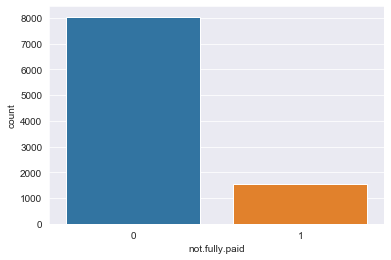

In [11]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

In [8]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()

In [9]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

In [10]:
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)

In [11]:
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


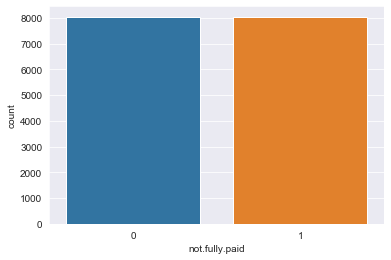

In [16]:
#df_test_over['not.fully.paid'].value_counts().plot(kind='bar', title='Count (not.fully.paid)')

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

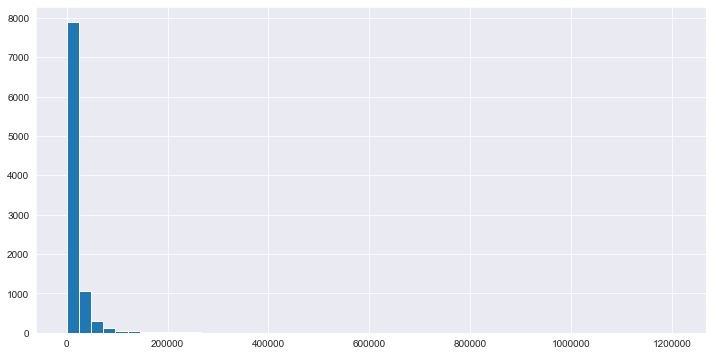

In [17]:
df['revol.bal'].hist(figsize=[12,6], bins=50)

In [12]:
df1=pd.get_dummies(df, columns=['purpose'])

Text(0.5, 0, 'FICO')

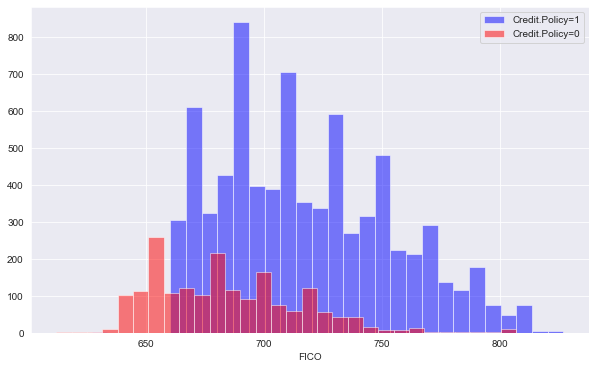

In [19]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

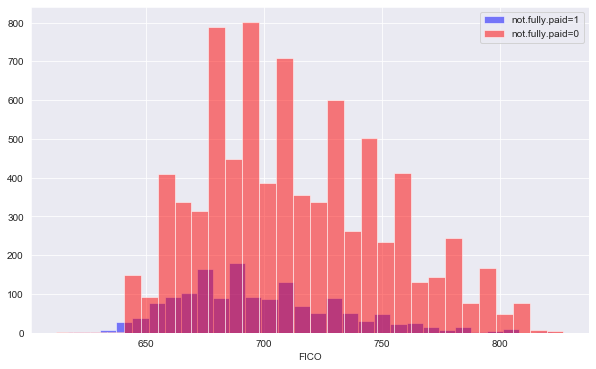

In [20]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

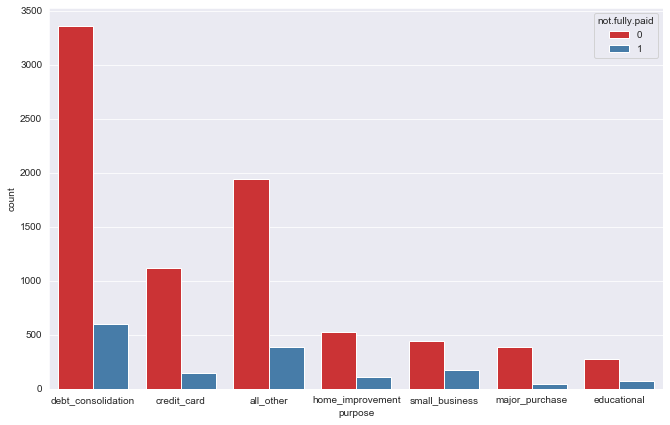

In [21]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

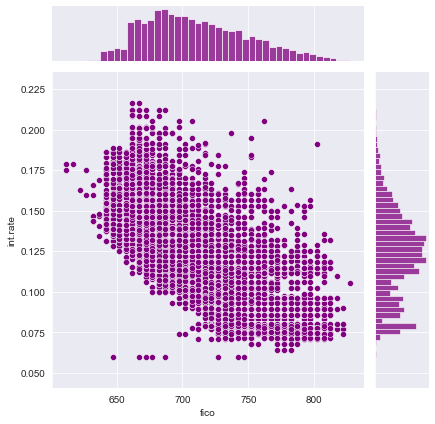

In [22]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

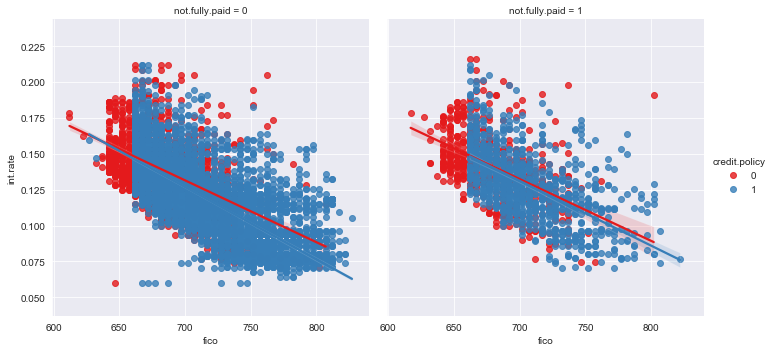

In [23]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [13]:
cat_feats = ['purpose']
#cat_feats =df_test_over

In [14]:
#final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data = pd.get_dummies(df_test_over,columns=cat_feats,drop_first=True)

In [15]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 4350
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [16]:
final_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294030,0.043178,0.011982,-0.105146,0.372619,0.098021,-0.184439,-0.093328,-0.552934,-0.062426,-0.064936,-0.206020,-0.000520,0.044708,-0.038971,-0.012923,0.036825,-0.015518
int.rate,-0.294030,1.000000,0.272171,0.082545,0.219165,-0.684226,-0.103948,0.077809,0.413929,0.188604,0.148445,0.108832,0.227287,-0.035525,0.076256,-0.018782,-0.038465,-0.059507,0.174522
installment,0.043178,0.272171,1.000000,0.479247,0.030319,0.109365,0.194930,0.248581,0.062311,-0.004239,0.001752,-0.022674,0.076527,0.001479,0.120881,-0.098015,0.047131,-0.052345,0.186241
log.annual.inc,0.011982,0.082545,0.479247,1.000000,-0.025935,0.112265,0.346215,0.379170,0.077621,0.047471,0.015333,0.015154,-0.035128,0.073516,-0.031839,-0.126758,0.113964,-0.027801,0.122473
dti,-0.105146,0.219165,0.030319,-0.025935,1.000000,-0.229669,0.095278,0.165348,0.337104,0.032733,-0.031650,0.020644,0.058843,0.073853,0.177002,-0.037193,-0.094776,-0.081629,-0.047640
fico,0.372619,-0.684226,0.109365,0.112265,-0.229669,1.000000,0.263048,0.018658,-0.488889,-0.192469,-0.210002,-0.156382,-0.215025,-0.015199,-0.126746,-0.023126,0.089486,0.058887,0.070779
days.with.cr.line,0.098021,-0.103948,0.194930,0.346215,0.095278,0.263048,1.000000,0.247503,0.023304,-0.029567,0.078105,0.068794,-0.035632,0.062914,-0.009445,-0.055798,0.074176,-0.022382,0.046128
revol.bal,-0.184439,0.077809,0.248581,0.379170,0.165348,0.018658,0.247503,1.000000,0.161631,0.035158,-0.029704,-0.034399,0.064307,0.047984,-0.016847,-0.034740,-0.005597,-0.055579,0.130350
revol.util,-0.093328,0.413929,0.062311,0.077621,0.337104,-0.488889,0.023304,0.161631,1.000000,-0.025750,-0.050002,0.075294,0.113861,0.099433,0.193854,-0.062465,-0.107384,-0.117554,-0.059992
inq.last.6mths,-0.552934,0.188604,-0.004239,0.047471,0.032733,-0.192469,-0.029567,0.035158,-0.025750,1.000000,0.025005,0.110661,0.184418,-0.036797,-0.065100,0.037978,0.079726,-0.001440,0.038310


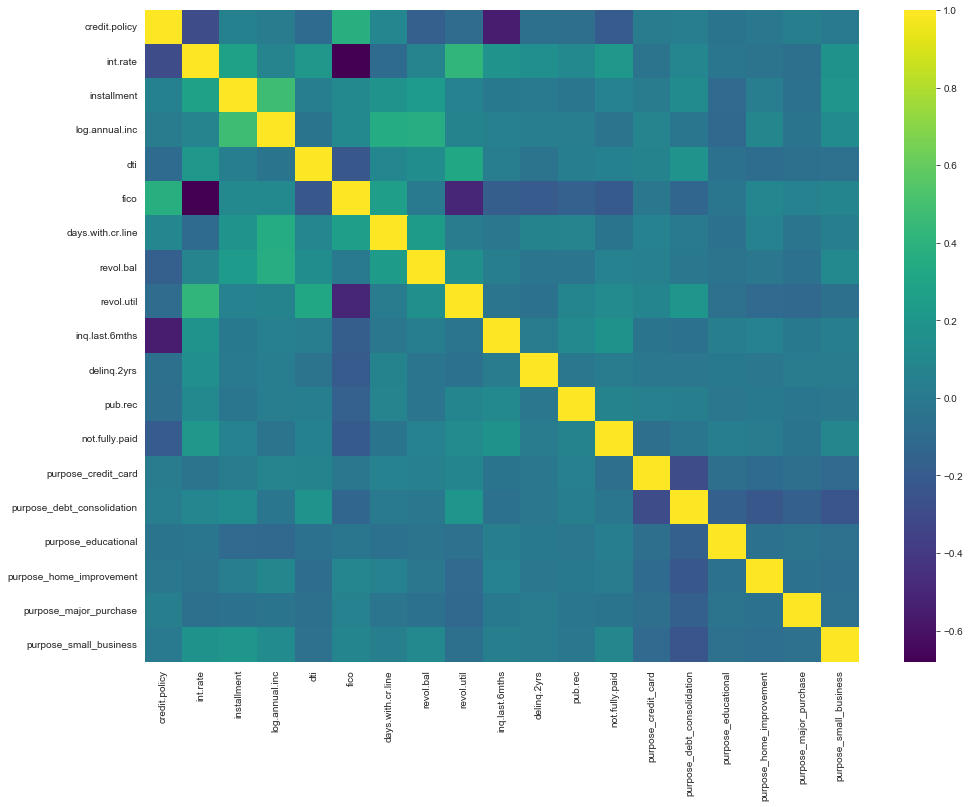

In [28]:
plt.figure(
        figsize=[16,12]
)

sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [17]:
to_drop2 = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

final_data.drop(to_drop2, axis=1, inplace=True)
#We only focus on the grids of yellow or very light green. After comparing with the feature description again,  revol.bal,day.with.cr.line,installment can repsent by annual income. revol.util can repsent by int.rate,  

In [18]:
final_data.isnull().mean()

credit.policy                 0.0
int.rate                      0.0
log.annual.inc                0.0
dti                           0.0
fico                          0.0
revol.util                    0.0
inq.last.6mths                0.0
delinq.2yrs                   0.0
pub.rec                       0.0
not.fully.paid                0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_major_purchase        0.0
purpose_small_business        0.0
dtype: float64

In [19]:
#to_train = df1[df1['not.fully.paid'].isin([0,1])]
#to_pred = df1[df1['not.fully.paid'] == 2]

to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

In [20]:
X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(11263, 15)

In [23]:
model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

In [24]:
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.6031 - val_loss: 0.6591 - val_accuracy: 0.6039
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6185 - val_loss: 0.6513 - val_accuracy: 0.6066
Epoch 3/200
44/44 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.6234 - val_loss: 0.6517 - val_accuracy: 0.6043
Epoch 4/200
44/44 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.6283 - val_loss: 0.6466 - val_accuracy: 0.6136
Epoch 5/200
44/44 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.6284 - val_loss: 0.6502 - val_accuracy: 0.6130
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6321 - val_loss: 0.6443 - val_accuracy: 0.6132
Epoch 7/200
44/44 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6321 - val_loss: 0.6459 - val_accuracy: 0.6180
Epoch 8/200
4

Epoch 59/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.6756 - val_loss: 0.6170 - val_accuracy: 0.6457
Epoch 60/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.6799 - val_loss: 0.6155 - val_accuracy: 0.6534
Epoch 61/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.6829 - val_loss: 0.6110 - val_accuracy: 0.6544
Epoch 62/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.6830 - val_loss: 0.6137 - val_accuracy: 0.6534
Epoch 63/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.6804 - val_loss: 0.6109 - val_accuracy: 0.6544
Epoch 64/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.6838 - val_loss: 0.6157 - val_accuracy: 0.6532
Epoch 65/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.6828 - val_loss: 0.6103 - val_accuracy: 0.6567
Epoch 

44/44 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7216 - val_loss: 0.5930 - val_accuracy: 0.6878
Epoch 117/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7278 - val_loss: 0.5988 - val_accuracy: 0.6814
Epoch 118/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7285 - val_loss: 0.6026 - val_accuracy: 0.6774
Epoch 119/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7282 - val_loss: 0.5973 - val_accuracy: 0.6739
Epoch 120/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7272 - val_loss: 0.5963 - val_accuracy: 0.6839
Epoch 121/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7310 - val_loss: 0.6028 - val_accuracy: 0.6853
Epoch 122/200
44/44 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7280 - val_loss: 0.5937 - val_accuracy: 0.6824
Epoch 123/200

44/44 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7670 - val_loss: 0.5801 - val_accuracy: 0.7048
Epoch 174/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.7603 - val_loss: 0.5849 - val_accuracy: 0.7029
Epoch 175/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7620 - val_loss: 0.5865 - val_accuracy: 0.7021
Epoch 176/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7645 - val_loss: 0.5903 - val_accuracy: 0.6979
Epoch 177/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7636 - val_loss: 0.5844 - val_accuracy: 0.7011
Epoch 178/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7615 - val_loss: 0.5819 - val_accuracy: 0.7064
Epoch 179/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.7676 - val_loss: 0.5899 - val_accuracy: 0.7048
Epoch 180/200

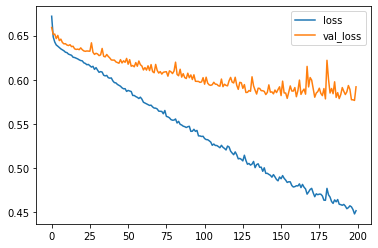

In [25]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() #over fitting 

In [26]:
predictions = model.predict_classes(X_test)

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1477  960]
 [ 504 1886]] 
               precision    recall  f1-score   support

           0       0.75      0.61      0.67      2437
           1       0.66      0.79      0.72      2390

    accuracy                           0.70      4827
   macro avg       0.70      0.70      0.69      4827
weighted avg       0.70      0.70      0.69      4827



In [27]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6798 - binary_accuracy: 0.5688 - val_loss: 0.6630 - val_binary_accuracy: 0.6049
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6036 - val_loss: 0.6575 - val_binary_accuracy: 0.6080
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6570 - binary_accuracy: 0.6151 - val_loss: 0.6546 - val_binary_accuracy: 0.6134
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6556 - binary_accuracy: 0.6099 - val_loss: 0.6525 - val_binary_accuracy: 0.6136
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6507 - binary_accuracy: 0.6199 - val_loss: 0.6505 - val_binary_accuracy: 0.6155
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6498 - binary_accuracy: 0.6222 - val_loss: 0.6487 - val_binary_accuracy: 0.6068
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - los

44/44 [==============================] - 0s 2ms/step - loss: 0.6163 - binary_accuracy: 0.6516 - val_loss: 0.6295 - val_binary_accuracy: 0.6348
Epoch 54/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6163 - binary_accuracy: 0.6483 - val_loss: 0.6266 - val_binary_accuracy: 0.6356
Epoch 55/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6176 - binary_accuracy: 0.6470 - val_loss: 0.6264 - val_binary_accuracy: 0.6437
Epoch 56/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6146 - binary_accuracy: 0.6520 - val_loss: 0.6255 - val_binary_accuracy: 0.6389
Epoch 57/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6138 - binary_accuracy: 0.6516 - val_loss: 0.6266 - val_binary_accuracy: 0.6451
Epoch 58/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6149 - binary_accuracy: 0.6491 - val_loss: 0.6255 - val_binary_accuracy: 0.6387
Epoch 59/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6

44/44 [==============================] - 0s 2ms/step - loss: 0.5929 - binary_accuracy: 0.6699 - val_loss: 0.6147 - val_binary_accuracy: 0.6542
Epoch 106/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5886 - binary_accuracy: 0.6695 - val_loss: 0.6108 - val_binary_accuracy: 0.6559
Epoch 107/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5913 - binary_accuracy: 0.6696 - val_loss: 0.6113 - val_binary_accuracy: 0.6559
Epoch 108/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5924 - binary_accuracy: 0.6704 - val_loss: 0.6111 - val_binary_accuracy: 0.6557
Epoch 109/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5890 - binary_accuracy: 0.6736 - val_loss: 0.6093 - val_binary_accuracy: 0.6555
Epoch 110/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5877 - binary_accuracy: 0.6736 - val_loss: 0.6123 - val_binary_accuracy: 0.6534
Epoch 111/200
44/44 [==============================] - 0s 2ms/step - los

44/44 [==============================] - 0s 2ms/step - loss: 0.5692 - binary_accuracy: 0.6855 - val_loss: 0.5925 - val_binary_accuracy: 0.6692
Epoch 158/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5684 - binary_accuracy: 0.6860 - val_loss: 0.5951 - val_binary_accuracy: 0.6702
Epoch 159/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5698 - binary_accuracy: 0.6853 - val_loss: 0.5954 - val_binary_accuracy: 0.6704
Epoch 160/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5665 - binary_accuracy: 0.6861 - val_loss: 0.5931 - val_binary_accuracy: 0.6741
Epoch 161/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5660 - binary_accuracy: 0.6887 - val_loss: 0.5940 - val_binary_accuracy: 0.6714
Epoch 162/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5598 - binary_accuracy: 0.6979 - val_loss: 0.5912 - val_binary_accuracy: 0.6760
Epoch 163/200
44/44 [==============================] - 0s 2ms/step - los

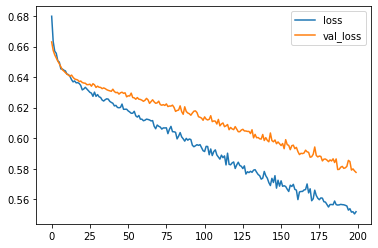

In [28]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() #The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model

Text(0, 0.5, 'True positive rate (TPR)')

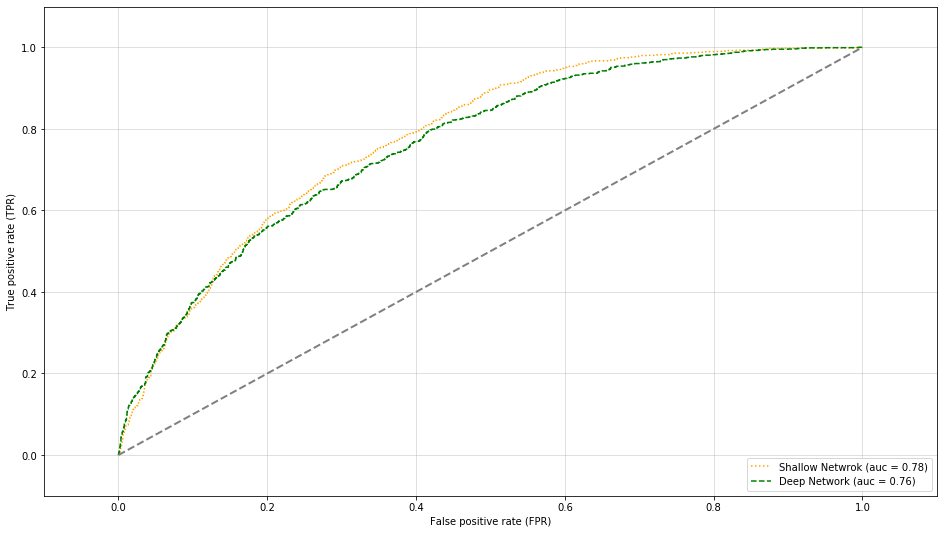

In [29]:
colors = ['orange', 'green']
linestyles = [':', '--']
all_clf = [model, model_new]
clf_labels = ['Shallow Netwrok','Deep Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

        # assuming the label of the positive class is 1
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                         y_score=y_pred)
        roc_auc = auc(x=fpr, y=tpr)
        plt.plot(fpr, tpr,
                 color=clr,
                 linestyle=ls,
                 label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
#plt.savefig('images/07_04', dpi=300)

Text(0, 0.5, 'Precision')

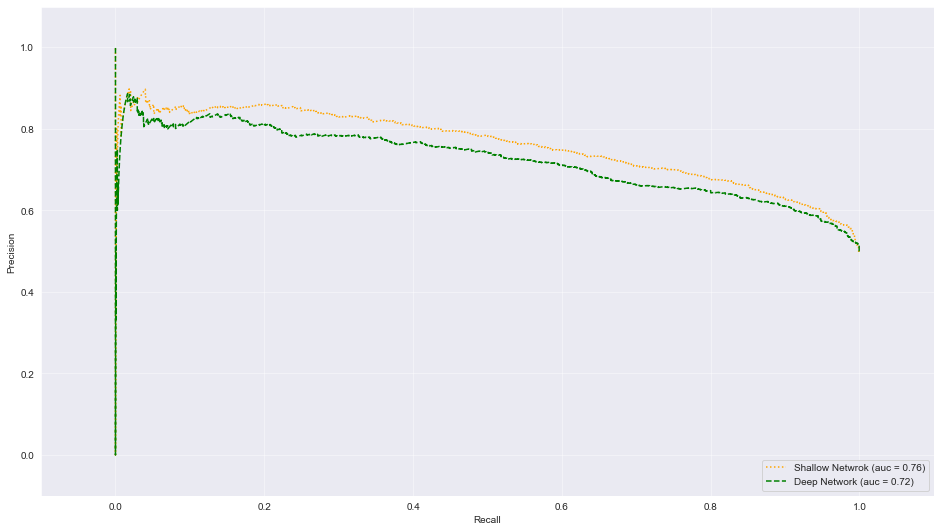

In [42]:
colors = ['orange', 'green']
linestyles = [':', '--']
all_clf = [model, model_new]
clf_labels = ['Shallow Netwrok','Deep Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
    lr_auc = auc(lr_recall, lr_precision)
    plt.plot(lr_recall, lr_precision,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, lr_auc))
plt.legend(loc='lower right')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [30]:
model_deeper = Sequential()

model_deeper.add(
    Dense(94, activation='selu', kernel_initializer="he_normal")
)

model_deeper.add(Dropout(0.2))

model_deeper.add(
    Dense(150, activation='selu')
)

model_deeper.add(Dropout(0.2))

model_deeper.add(
    Dense(150, activation='selu')
)

model_deeper.add(Dropout(0.2))

model_deeper.add(
    Dense(150, activation='selu')
)

model_deeper.add(Dropout(0.2))
model_deeper.add(
    Dense(50, activation='selu')
)

model_deeper.add(Dropout(0.2))

model_deeper.add(
    Dense(1, activation='sigmoid')
)

model_deeper.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)


model_deeper.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 6ms/step - loss: 0.7966 - binary_accuracy: 0.5617 - val_loss: 0.6589 - val_binary_accuracy: 0.6060
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 0.7161 - binary_accuracy: 0.5797 - val_loss: 0.6616 - val_binary_accuracy: 0.6022
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 0.7057 - binary_accuracy: 0.5810 - val_loss: 0.6553 - val_binary_accuracy: 0.6056
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6875 - binary_accuracy: 0.5899 - val_loss: 0.6543 - val_binary_accuracy: 0.6097
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6884 - binary_accuracy: 0.5830 - val_loss: 0.6522 - val_binary_accuracy: 0.6097
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6749 - binary_accuracy: 0.6025 - val_loss: 0.6528 - val_binary_accuracy: 0.6109
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - los

44/44 [==============================] - 0s 4ms/step - loss: 0.6326 - binary_accuracy: 0.6333 - val_loss: 0.6386 - val_binary_accuracy: 0.6240
Epoch 54/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6317 - binary_accuracy: 0.6376 - val_loss: 0.6372 - val_binary_accuracy: 0.6242
Epoch 55/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6341 - binary_accuracy: 0.6282 - val_loss: 0.6366 - val_binary_accuracy: 0.6261
Epoch 56/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6324 - binary_accuracy: 0.6319 - val_loss: 0.6371 - val_binary_accuracy: 0.6265
Epoch 57/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6340 - binary_accuracy: 0.6279 - val_loss: 0.6372 - val_binary_accuracy: 0.6269
Epoch 58/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6327 - binary_accuracy: 0.6312 - val_loss: 0.6361 - val_binary_accuracy: 0.6213
Epoch 59/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6

44/44 [==============================] - 0s 4ms/step - loss: 0.6241 - binary_accuracy: 0.6404 - val_loss: 0.6334 - val_binary_accuracy: 0.6302
Epoch 106/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6223 - binary_accuracy: 0.6428 - val_loss: 0.6330 - val_binary_accuracy: 0.6250
Epoch 107/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6237 - binary_accuracy: 0.6433 - val_loss: 0.6345 - val_binary_accuracy: 0.6339
Epoch 108/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6230 - binary_accuracy: 0.6397 - val_loss: 0.6327 - val_binary_accuracy: 0.6265
Epoch 109/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6229 - binary_accuracy: 0.6429 - val_loss: 0.6313 - val_binary_accuracy: 0.6302
Epoch 110/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6235 - binary_accuracy: 0.6394 - val_loss: 0.6329 - val_binary_accuracy: 0.6265
Epoch 111/200
44/44 [==============================] - 0s 4ms/step - los

44/44 [==============================] - 0s 4ms/step - loss: 0.6051 - binary_accuracy: 0.6587 - val_loss: 0.6189 - val_binary_accuracy: 0.6470
Epoch 158/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6073 - binary_accuracy: 0.6570 - val_loss: 0.6177 - val_binary_accuracy: 0.6451
Epoch 159/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6056 - binary_accuracy: 0.6596 - val_loss: 0.6184 - val_binary_accuracy: 0.6526
Epoch 160/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6087 - binary_accuracy: 0.6567 - val_loss: 0.6195 - val_binary_accuracy: 0.6486
Epoch 161/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6013 - binary_accuracy: 0.6661 - val_loss: 0.6169 - val_binary_accuracy: 0.6511
Epoch 162/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6000 - binary_accuracy: 0.6642 - val_loss: 0.6131 - val_binary_accuracy: 0.6464
Epoch 163/200
44/44 [==============================] - 0s 4ms/step - los

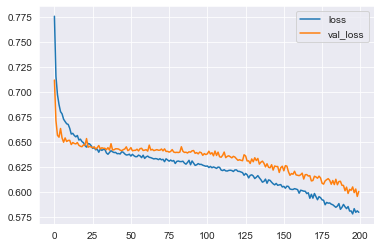

In [44]:
pd.DataFrame(model_deeper.history.history)[['loss','val_loss']].plot()

Text(0, 0.5, 'True positive rate (TPR)')

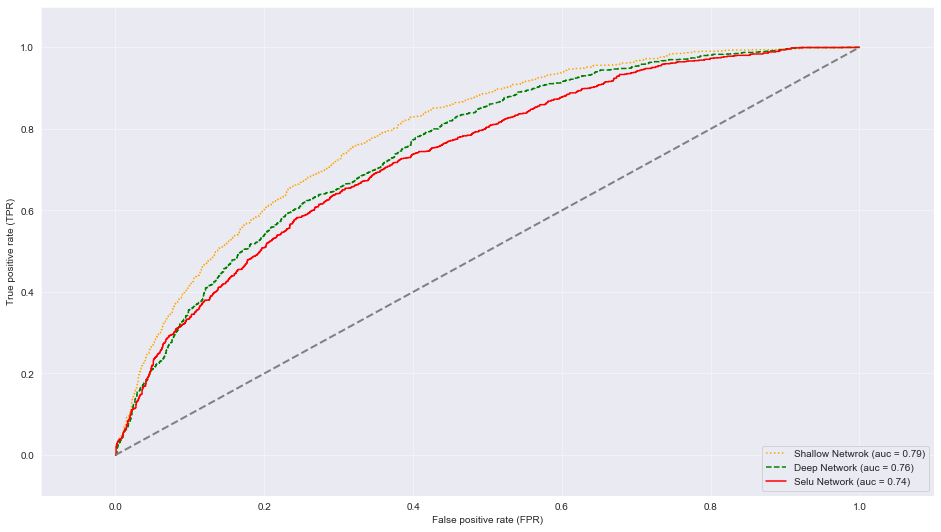

In [45]:
colors = ['orange', 'green', 'red']
linestyles = [':', '--', '-']
all_clf = [model, model_new, model_deeper]
clf_labels = ['Shallow Netwrok','Deep Network', 'Selu Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
#plt.savefig('images/07_04', dpi=300)

Text(0, 0.5, 'Precision')

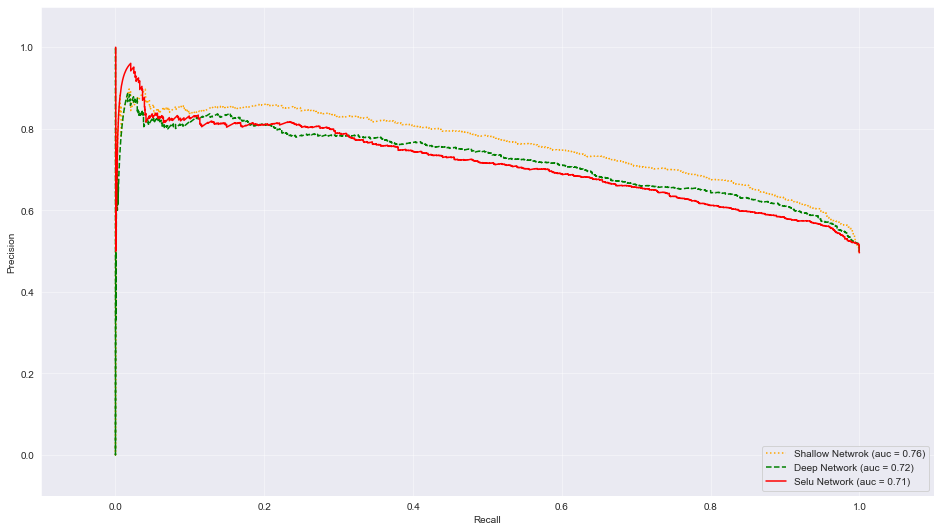

In [46]:
colors = ['orange', 'green', 'red']
linestyles = [':', '--','-']
all_clf = [model, model_new, model_deeper]
clf_labels = ['Shallow Netwrok','Deep Network', 'Selu Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
    lr_auc = auc(lr_recall, lr_precision)
    plt.plot(lr_recall, lr_precision,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, lr_auc))
plt.legend(loc='lower right')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [32]:
import keras

In [33]:


model_leaky = keras.models.Sequential([
                                        keras.layers.Dense(94, kernel_initializer="he_normal"),
                                        keras.layers.LeakyReLU(),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Dense(150, kernel_initializer="he_normal"),
                                        keras.layers.LeakyReLU(),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Dense(150, kernel_initializer="he_normal"),
                                        keras.layers.LeakyReLU(),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Dense(100, kernel_initializer="he_normal"),
                                        keras.layers.LeakyReLU(),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Dense(1, activation='sigmoid')
])
model_leaky.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
model_leaky.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 5ms/step - loss: 0.7020 - binary_accuracy: 0.5738 - val_loss: 0.6525 - val_binary_accuracy: 0.6043
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6636 - binary_accuracy: 0.6021 - val_loss: 0.6518 - val_binary_accuracy: 0.6114
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6609 - binary_accuracy: 0.6053 - val_loss: 0.6490 - val_binary_accuracy: 0.6087
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6545 - binary_accuracy: 0.6098 - val_loss: 0.6480 - val_binary_accuracy: 0.6082
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6509 - binary_accuracy: 0.6141 - val_loss: 0.6492 - val_binary_accuracy: 0.6045
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6493 - binary_accuracy: 0.6145 - val_loss: 0.6464 - val_binary_accuracy: 0.6082
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - los

44/44 [==============================] - 0s 4ms/step - loss: 0.6284 - binary_accuracy: 0.6387 - val_loss: 0.6355 - val_binary_accuracy: 0.6254
Epoch 54/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6284 - binary_accuracy: 0.6363 - val_loss: 0.6360 - val_binary_accuracy: 0.6240
Epoch 55/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6274 - binary_accuracy: 0.6396 - val_loss: 0.6340 - val_binary_accuracy: 0.6290
Epoch 56/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6290 - binary_accuracy: 0.6384 - val_loss: 0.6354 - val_binary_accuracy: 0.6238
Epoch 57/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6275 - binary_accuracy: 0.6357 - val_loss: 0.6346 - val_binary_accuracy: 0.6271
Epoch 58/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6265 - binary_accuracy: 0.6428 - val_loss: 0.6339 - val_binary_accuracy: 0.6277
Epoch 59/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6

44/44 [==============================] - 0s 4ms/step - loss: 0.6141 - binary_accuracy: 0.6528 - val_loss: 0.6251 - val_binary_accuracy: 0.6437
Epoch 106/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6174 - binary_accuracy: 0.6493 - val_loss: 0.6249 - val_binary_accuracy: 0.6372
Epoch 107/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6156 - binary_accuracy: 0.6453 - val_loss: 0.6266 - val_binary_accuracy: 0.6395
Epoch 108/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6151 - binary_accuracy: 0.6528 - val_loss: 0.6260 - val_binary_accuracy: 0.6406
Epoch 109/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6138 - binary_accuracy: 0.6486 - val_loss: 0.6256 - val_binary_accuracy: 0.6414
Epoch 110/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6142 - binary_accuracy: 0.6437 - val_loss: 0.6265 - val_binary_accuracy: 0.6439
Epoch 111/200
44/44 [==============================] - 0s 4ms/step - los

44/44 [==============================] - 0s 4ms/step - loss: 0.6023 - binary_accuracy: 0.6586 - val_loss: 0.6151 - val_binary_accuracy: 0.6561
Epoch 158/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6047 - binary_accuracy: 0.6536 - val_loss: 0.6147 - val_binary_accuracy: 0.6468
Epoch 159/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6015 - binary_accuracy: 0.6585 - val_loss: 0.6141 - val_binary_accuracy: 0.6489
Epoch 160/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6034 - binary_accuracy: 0.6569 - val_loss: 0.6136 - val_binary_accuracy: 0.6410
Epoch 161/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6003 - binary_accuracy: 0.6596 - val_loss: 0.6137 - val_binary_accuracy: 0.6505
Epoch 162/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6025 - binary_accuracy: 0.6584 - val_loss: 0.6144 - val_binary_accuracy: 0.6515
Epoch 163/200
44/44 [==============================] - 0s 4ms/step - los

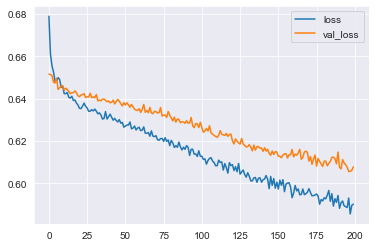

In [49]:
pd.DataFrame(model_leaky.history.history)[['loss','val_loss']].plot()

Text(0, 0.5, 'True positive rate (TPR)')

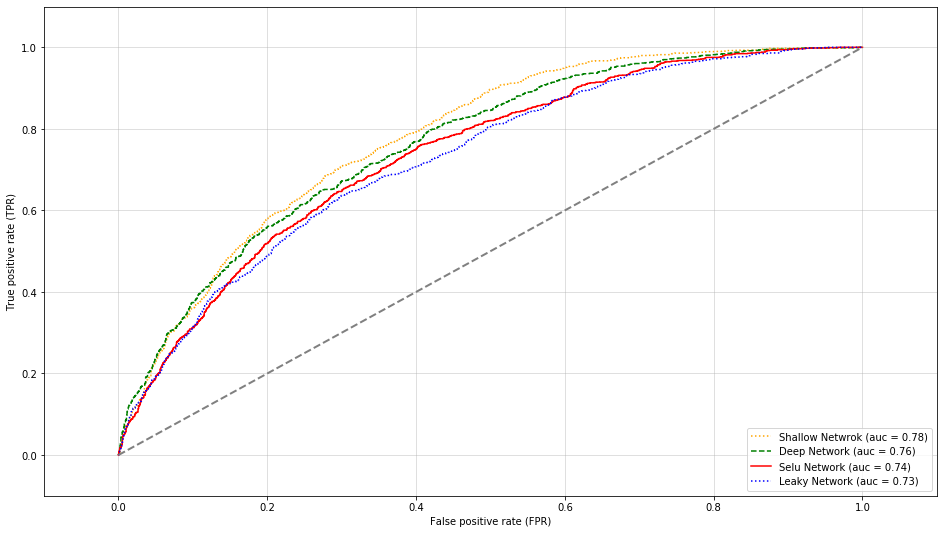

In [34]:
colors = ['orange', 'green', 'red','blue']
linestyles = [':', '--', '-','dotted']
all_clf = [model, model_new, model_deeper, model_leaky]
clf_labels = ['Shallow Netwrok','Deep Network', 'Selu Network', 'Leaky Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

Text(0, 0.5, 'Precision')

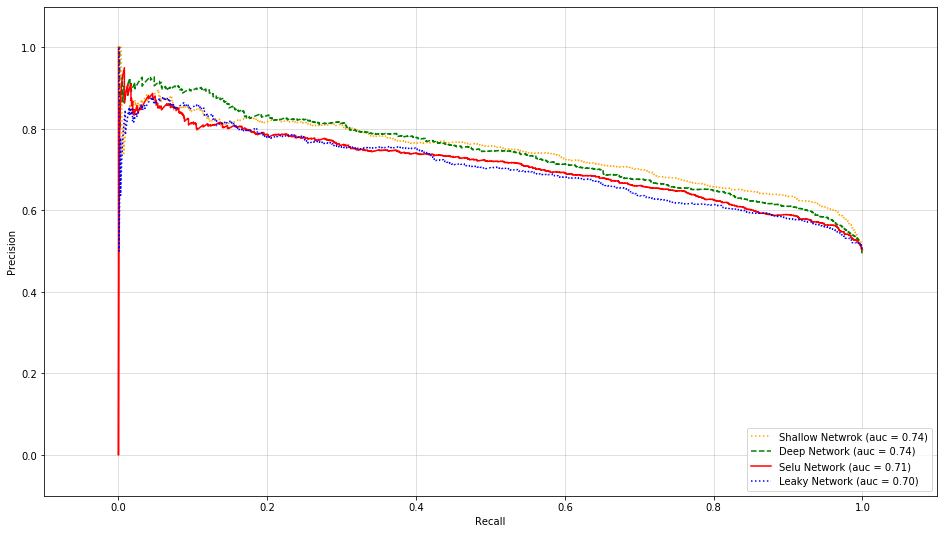

In [35]:
colors = ['orange', 'green', 'red','blue']
linestyles = [':', '--','-','dotted']
all_clf = [model, model_new, model_deeper,model_leaky]
clf_labels = ['Shallow Netwrok','Deep Network', 'Selu Network', 'Leaky Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
    lr_auc = auc(lr_recall, lr_precision)
    plt.plot(lr_recall, lr_precision,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, lr_auc))
plt.legend(loc='lower right')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [36]:
predictions = model_leaky.predict_classes(X_test)

print(
    confusion_matrix(y_test,predictions),
    '\n',
    classification_report(y_test,predictions)
)

[[1611  826]
 [ 799 1591]] 
               precision    recall  f1-score   support

           0       0.67      0.66      0.66      2437
           1       0.66      0.67      0.66      2390

    accuracy                           0.66      4827
   macro avg       0.66      0.66      0.66      4827
weighted avg       0.66      0.66      0.66      4827



In [37]:
model_l2 = keras.models.Sequential([
    keras.layers.Dense(94, kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(150, kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(150, kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model_l2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
model_l2.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 5ms/step - loss: 1.6396 - binary_accuracy: 0.5703 - val_loss: 1.5279 - val_binary_accuracy: 0.5985
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 1.4699 - binary_accuracy: 0.5993 - val_loss: 1.3964 - val_binary_accuracy: 0.6103
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 1.3413 - binary_accuracy: 0.6084 - val_loss: 1.2814 - val_binary_accuracy: 0.6062
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 1.2330 - binary_accuracy: 0.6139 - val_loss: 1.1823 - val_binary_accuracy: 0.6095
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 1.1401 - binary_accuracy: 0.6171 - val_loss: 1.1001 - val_binary_accuracy: 0.6128
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 1.0625 - binary_accuracy: 0.6180 - val_loss: 1.0282 - val_binary_accuracy: 0.6082
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - los

44/44 [==============================] - 0s 4ms/step - loss: 0.6492 - binary_accuracy: 0.6314 - val_loss: 0.6571 - val_binary_accuracy: 0.6101
Epoch 54/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6493 - binary_accuracy: 0.6244 - val_loss: 0.6531 - val_binary_accuracy: 0.6201
Epoch 55/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6475 - binary_accuracy: 0.6306 - val_loss: 0.6530 - val_binary_accuracy: 0.6161
Epoch 56/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6497 - binary_accuracy: 0.6291 - val_loss: 0.6538 - val_binary_accuracy: 0.6211
Epoch 57/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6501 - binary_accuracy: 0.6231 - val_loss: 0.6520 - val_binary_accuracy: 0.6161
Epoch 58/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6489 - binary_accuracy: 0.6322 - val_loss: 0.6525 - val_binary_accuracy: 0.6145
Epoch 59/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6

44/44 [==============================] - 0s 4ms/step - loss: 0.6440 - binary_accuracy: 0.6298 - val_loss: 0.6526 - val_binary_accuracy: 0.6205
Epoch 106/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6453 - binary_accuracy: 0.6350 - val_loss: 0.6483 - val_binary_accuracy: 0.6165
Epoch 107/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6423 - binary_accuracy: 0.6320 - val_loss: 0.6483 - val_binary_accuracy: 0.6151
Epoch 108/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6438 - binary_accuracy: 0.6333 - val_loss: 0.6498 - val_binary_accuracy: 0.6136
Epoch 109/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6445 - binary_accuracy: 0.6333 - val_loss: 0.6480 - val_binary_accuracy: 0.6217
Epoch 110/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6425 - binary_accuracy: 0.6341 - val_loss: 0.6520 - val_binary_accuracy: 0.6186
Epoch 111/200
44/44 [==============================] - 0s 4ms/step - los

44/44 [==============================] - 0s 4ms/step - loss: 0.6414 - binary_accuracy: 0.6351 - val_loss: 0.6473 - val_binary_accuracy: 0.6265
Epoch 158/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6423 - binary_accuracy: 0.6313 - val_loss: 0.6468 - val_binary_accuracy: 0.6209
Epoch 159/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6424 - binary_accuracy: 0.6318 - val_loss: 0.6471 - val_binary_accuracy: 0.6288
Epoch 160/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6420 - binary_accuracy: 0.6332 - val_loss: 0.6491 - val_binary_accuracy: 0.6207
Epoch 161/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6414 - binary_accuracy: 0.6334 - val_loss: 0.6482 - val_binary_accuracy: 0.6217
Epoch 162/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6401 - binary_accuracy: 0.6345 - val_loss: 0.6552 - val_binary_accuracy: 0.6062
Epoch 163/200
44/44 [==============================] - 0s 4ms/step - los

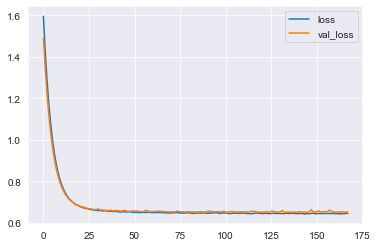

In [54]:
pd.DataFrame(model_l2.history.history)[['loss','val_loss']].plot()

Text(0, 0.5, 'True positive rate (TPR)')

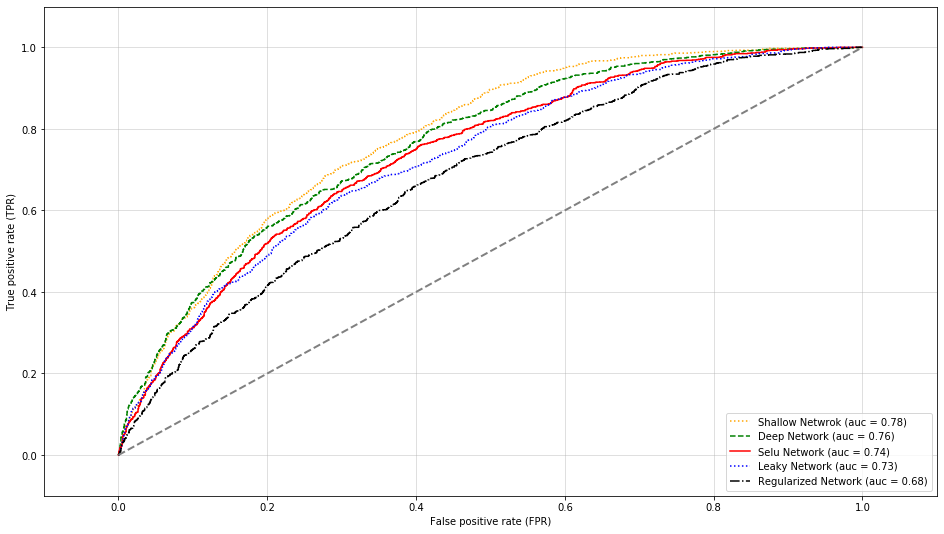

In [38]:
colors = ['orange', 'green', 'red','blue','black']
linestyles = [':', '--', '-','dotted','dashdot']
all_clf = [model, model_new, model_deeper, model_leaky,model_l2]
clf_labels = ['Shallow Netwrok','Deep Network', 'Selu Network', 'Leaky Network', 'Regularized Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

In [56]:
predictions = model_l2.predict_classes(X_test)

print(
    confusion_matrix(y_test,predictions),
    '\n',
    classification_report(y_test,predictions)
)

[[1277 1160]
 [ 640 1750]] 
               precision    recall  f1-score   support

           0       0.67      0.52      0.59      2437
           1       0.60      0.73      0.66      2390

    accuracy                           0.63      4827
   macro avg       0.63      0.63      0.62      4827
weighted avg       0.63      0.63      0.62      4827



In [39]:
model_prelu = keras.models.Sequential([
    keras.layers.Dense(94, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(150, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(150, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model_prelu.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
model_prelu.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6920 - binary_accuracy: 0.5641 - val_loss: 0.6639 - val_binary_accuracy: 0.6045
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6656 - binary_accuracy: 0.6006 - val_loss: 0.6551 - val_binary_accuracy: 0.6099
Epoch 3/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6573 - binary_accuracy: 0.6037 - val_loss: 0.6553 - val_binary_accuracy: 0.6049
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6555 - binary_accuracy: 0.6127 - val_loss: 0.6482 - val_binary_accuracy: 0.6095
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6505 - binary_accuracy: 0.6172 - val_loss: 0.6481 - val_binary_accuracy: 0.6078
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6479 - binary_accuracy: 0.6187 - val_loss: 0.6460 - val_binary_accuracy: 0.6085
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - los

44/44 [==============================] - 0s 4ms/step - loss: 0.6132 - binary_accuracy: 0.6475 - val_loss: 0.6223 - val_binary_accuracy: 0.6387
Epoch 54/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6151 - binary_accuracy: 0.6490 - val_loss: 0.6212 - val_binary_accuracy: 0.6387
Epoch 55/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6123 - binary_accuracy: 0.6509 - val_loss: 0.6206 - val_binary_accuracy: 0.6393
Epoch 56/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6124 - binary_accuracy: 0.6544 - val_loss: 0.6200 - val_binary_accuracy: 0.6416
Epoch 57/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6103 - binary_accuracy: 0.6564 - val_loss: 0.6224 - val_binary_accuracy: 0.6424
Epoch 58/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6110 - binary_accuracy: 0.6532 - val_loss: 0.6230 - val_binary_accuracy: 0.6375
Epoch 59/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6

44/44 [==============================] - 0s 4ms/step - loss: 0.5638 - binary_accuracy: 0.6884 - val_loss: 0.5931 - val_binary_accuracy: 0.6629
Epoch 106/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5662 - binary_accuracy: 0.6904 - val_loss: 0.5919 - val_binary_accuracy: 0.6760
Epoch 107/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5676 - binary_accuracy: 0.6876 - val_loss: 0.5901 - val_binary_accuracy: 0.6768
Epoch 108/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5665 - binary_accuracy: 0.6884 - val_loss: 0.5912 - val_binary_accuracy: 0.6725
Epoch 109/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5673 - binary_accuracy: 0.6889 - val_loss: 0.5875 - val_binary_accuracy: 0.6812
Epoch 110/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5654 - binary_accuracy: 0.6897 - val_loss: 0.5853 - val_binary_accuracy: 0.6797
Epoch 111/200
44/44 [==============================] - 0s 4ms/step - los

44/44 [==============================] - 0s 4ms/step - loss: 0.5242 - binary_accuracy: 0.7201 - val_loss: 0.5568 - val_binary_accuracy: 0.7073
Epoch 158/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5191 - binary_accuracy: 0.7259 - val_loss: 0.5611 - val_binary_accuracy: 0.7089
Epoch 159/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5209 - binary_accuracy: 0.7220 - val_loss: 0.5562 - val_binary_accuracy: 0.7180
Epoch 160/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5258 - binary_accuracy: 0.7147 - val_loss: 0.5556 - val_binary_accuracy: 0.7147
Epoch 161/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5212 - binary_accuracy: 0.7229 - val_loss: 0.5641 - val_binary_accuracy: 0.7149
Epoch 162/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5214 - binary_accuracy: 0.7238 - val_loss: 0.5542 - val_binary_accuracy: 0.7137
Epoch 163/200
44/44 [==============================] - 0s 4ms/step - los

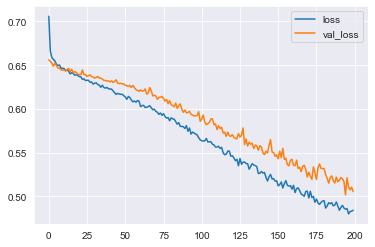

In [58]:
pd.DataFrame(model_prelu.history.history)[['loss','val_loss']].plot()

In [40]:
predictions = model_prelu.predict_classes(X_test)

print(
    confusion_matrix(y_test,predictions),
    '\n',
    classification_report(y_test,predictions)
)

[[1714  723]
 [ 551 1839]] 
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      2437
           1       0.72      0.77      0.74      2390

    accuracy                           0.74      4827
   macro avg       0.74      0.74      0.74      4827
weighted avg       0.74      0.74      0.74      4827



Text(0, 0.5, 'True positive rate (TPR)')

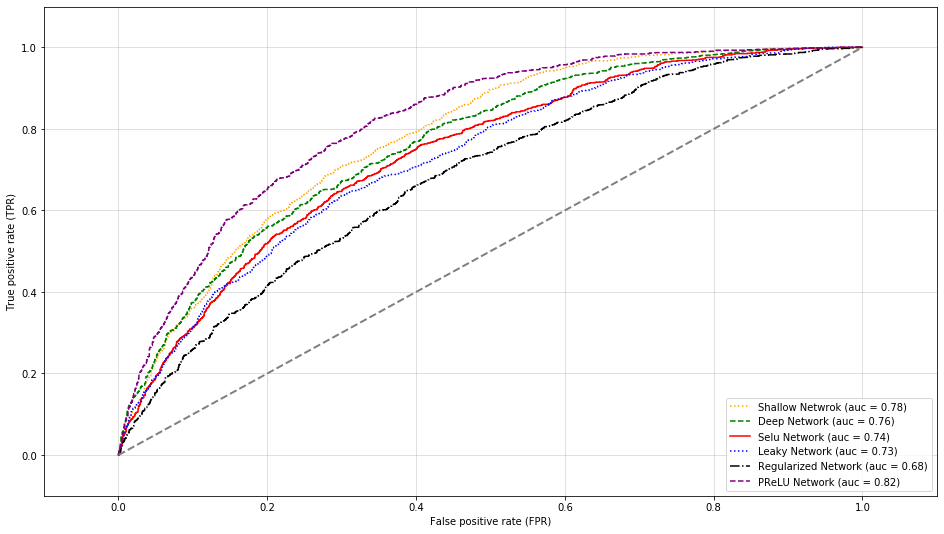

In [41]:
colors = ['orange', 'green', 'red','blue','black','purple']
linestyles = [':', '--', '-','dotted','dashdot','dashed']
all_clf = [model, model_new, model_deeper, model_leaky,model_l2, model_prelu]
clf_labels = ['Shallow Netwrok','Deep Network', 'Selu Network', 'Leaky Network', 'Regularized Network', 'PReLU Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

Text(0, 0.5, 'Precision')

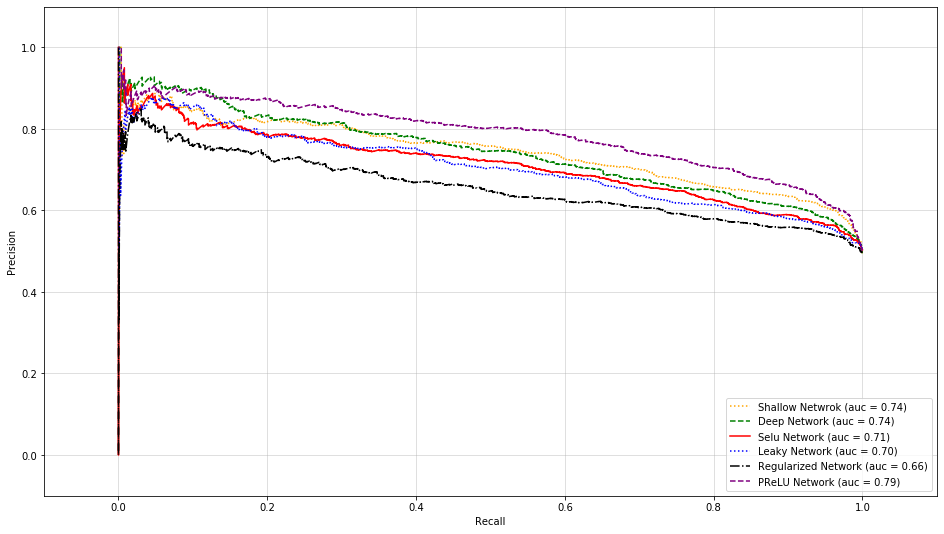

In [42]:
colors = ['orange', 'green', 'red','blue','black','purple']
linestyles = [':', '--', '-','dotted','dashdot','dashed']
all_clf = [model, model_new, model_deeper, model_leaky,model_l2, model_prelu]
clf_labels = ['Shallow Netwrok','Deep Network', 'Selu Network', 'Leaky Network', 'Regularized Network', 'PReLU Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
    lr_auc = auc(lr_recall, lr_precision)
    plt.plot(lr_recall, lr_precision,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, lr_auc))
plt.legend(loc='lower right')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [43]:
model_prelu_2 = keras.models.Sequential([
    keras.layers.Dense(94, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(30, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(30, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(15, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model_prelu_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
model_prelu_2.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6933 - binary_accuracy: 0.5305 - val_loss: 0.6775 - val_binary_accuracy: 0.5857
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6768 - binary_accuracy: 0.5736 - val_loss: 0.6614 - val_binary_accuracy: 0.6118
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6689 - binary_accuracy: 0.5906 - val_loss: 0.6579 - val_binary_accuracy: 0.6087
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6662 - binary_accuracy: 0.5933 - val_loss: 0.6582 - val_binary_accuracy: 0.6211
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6628 - binary_accuracy: 0.6074 - val_loss: 0.6530 - val_binary_accuracy: 0.6153
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6609 - binary_accuracy: 0.6070 - val_loss: 0.6526 - val_binary_accuracy: 0.6167
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - los

44/44 [==============================] - 0s 3ms/step - loss: 0.6301 - binary_accuracy: 0.6393 - val_loss: 0.6333 - val_binary_accuracy: 0.6267
Epoch 54/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6301 - binary_accuracy: 0.6378 - val_loss: 0.6337 - val_binary_accuracy: 0.6285
Epoch 55/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6313 - binary_accuracy: 0.6377 - val_loss: 0.6341 - val_binary_accuracy: 0.6275
Epoch 56/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6314 - binary_accuracy: 0.6357 - val_loss: 0.6333 - val_binary_accuracy: 0.6314
Epoch 57/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6292 - binary_accuracy: 0.6371 - val_loss: 0.6330 - val_binary_accuracy: 0.6314
Epoch 58/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6283 - binary_accuracy: 0.6423 - val_loss: 0.6324 - val_binary_accuracy: 0.6288
Epoch 59/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6

44/44 [==============================] - 0s 3ms/step - loss: 0.6106 - binary_accuracy: 0.6503 - val_loss: 0.6213 - val_binary_accuracy: 0.6389
Epoch 106/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6077 - binary_accuracy: 0.6584 - val_loss: 0.6200 - val_binary_accuracy: 0.6433
Epoch 107/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6117 - binary_accuracy: 0.6489 - val_loss: 0.6206 - val_binary_accuracy: 0.6433
Epoch 108/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6110 - binary_accuracy: 0.6551 - val_loss: 0.6204 - val_binary_accuracy: 0.6422
Epoch 109/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6129 - binary_accuracy: 0.6543 - val_loss: 0.6214 - val_binary_accuracy: 0.6385
Epoch 110/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6079 - binary_accuracy: 0.6547 - val_loss: 0.6220 - val_binary_accuracy: 0.6430
Epoch 111/200
44/44 [==============================] - 0s 3ms/step - los

44/44 [==============================] - 0s 2ms/step - loss: 0.5946 - binary_accuracy: 0.6651 - val_loss: 0.6123 - val_binary_accuracy: 0.6551
Epoch 158/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5995 - binary_accuracy: 0.6613 - val_loss: 0.6112 - val_binary_accuracy: 0.6542
Epoch 159/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5944 - binary_accuracy: 0.6679 - val_loss: 0.6095 - val_binary_accuracy: 0.6499
Epoch 160/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5896 - binary_accuracy: 0.6678 - val_loss: 0.6079 - val_binary_accuracy: 0.6542
Epoch 161/200
44/44 [==============================] - 0s 2ms/step - loss: 0.5924 - binary_accuracy: 0.6678 - val_loss: 0.6068 - val_binary_accuracy: 0.6586
Epoch 162/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5913 - binary_accuracy: 0.6672 - val_loss: 0.6076 - val_binary_accuracy: 0.6586
Epoch 163/200
44/44 [==============================] - 0s 2ms/step - los

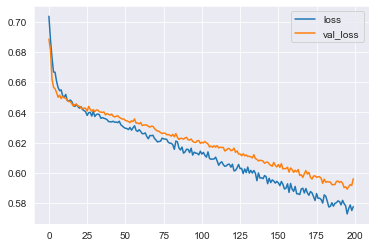

In [63]:
pd.DataFrame(model_prelu_2.history.history)[['loss','val_loss']].plot()

Text(0, 0.5, 'True positive rate (TPR)')

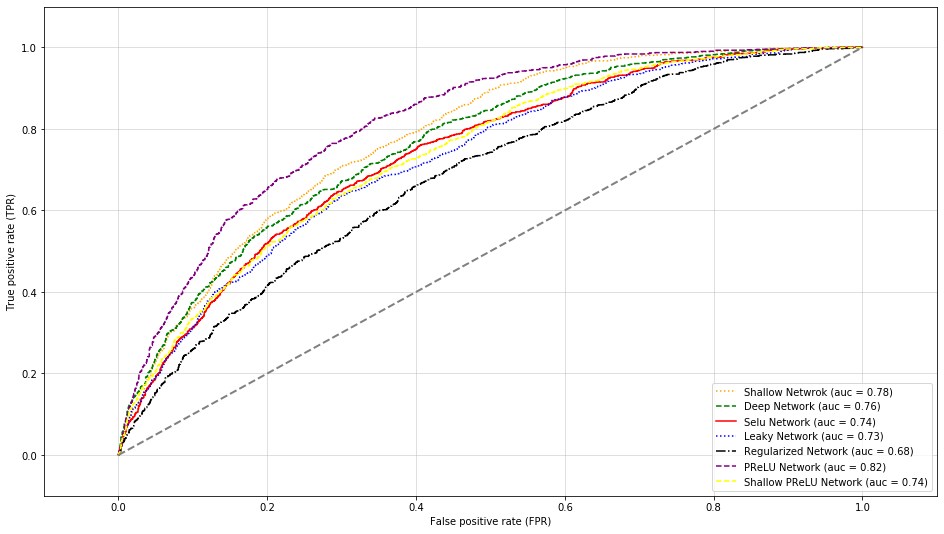

In [44]:
colors = ['orange', 'green', 'red','blue','black','purple','yellow']
linestyles = [':', '--', '-','dotted','dashdot','dashed','dashed']
all_clf = [model, model_new, model_deeper, model_leaky,model_l2, model_prelu,model_prelu_2]
clf_labels = ['Shallow Netwrok','Deep Network', 'Selu Network', 'Leaky Network', 'Regularized Network', 'PReLU Network', 'Shallow PReLU Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import (cross_val_score,
                                     cross_val_predict,
                                     StratifiedKFold,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     train_test_split)

In [46]:
xgb_base = XGBClassifier(booster='gbtree', objective='binary:logistic',eval_metric='logloss' ,use_label_encoder=False, random_state=2)

In [47]:
# Obtain scores of cross-validation
scores = cross_val_score(xgb_base, X_train, y_train, cv=5)

# Display accuracy
print('Accuracy:', np.round(scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.85 0.85 0.83 0.84 0.83]
Accuracy mean: 0.84


In [48]:
evalset = [(X_train, y_train), (X_test,y_test)]

In [49]:
xgb_base.fit(X_train, y_train, eval_set=evalset)

[0]	validation_0-logloss:0.65697	validation_1-logloss:0.66300
[1]	validation_0-logloss:0.63321	validation_1-logloss:0.64444
[2]	validation_0-logloss:0.61464	validation_1-logloss:0.63088
[3]	validation_0-logloss:0.60182	validation_1-logloss:0.62258
[4]	validation_0-logloss:0.58973	validation_1-logloss:0.61425
[5]	validation_0-logloss:0.57625	validation_1-logloss:0.60537
[6]	validation_0-logloss:0.56581	validation_1-logloss:0.59719
[7]	validation_0-logloss:0.55555	validation_1-logloss:0.59087
[8]	validation_0-logloss:0.54832	validation_1-logloss:0.58663
[9]	validation_0-logloss:0.54561	validation_1-logloss:0.58510
[10]	validation_0-logloss:0.53911	validation_1-logloss:0.58056
[11]	validation_0-logloss:0.53366	validation_1-logloss:0.57781
[12]	validation_0-logloss:0.53018	validation_1-logloss:0.57509
[13]	validation_0-logloss:0.52378	validation_1-logloss:0.56979
[14]	validation_0-logloss:0.51920	validation_1-logloss:0.56695
[15]	validation_0-logloss:0.50888	validation_1-logloss:0.56156
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=2, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

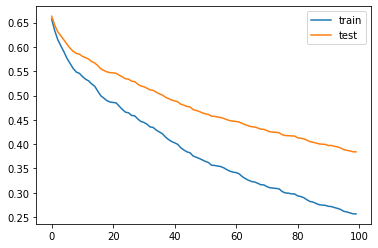

In [50]:
# retrieve performance metrics
results = xgb_base.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [51]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [52]:
def xgboost_hyperarameter_search( X, y, params, random=False):

    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic' ,eval_metric='logloss' ,use_label_encoder=False, random_state=2)

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1, random_state=2)
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)

    # Fit grid_reg on X_train and y_train
    grid.fit(X, y)

    # Extract best params
    best_params = grid.best_params_

    # Print best params
    print("Best params:", best_params)

    # Compute best score
    best_score = grid.best_score_

    # Print best score
    print("Best score: {:.5f}".format(best_score))

In [73]:
xgboost_hyperarameter_search(X_train,y_train,params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                                                   'min_child_weight':[1, 2, 3, 4, 5],
                                                                   'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
                                                                   'max_depth':[1, 2, 3, 4, 5, None],
                                                                   'n_estimators':[100, 200, 300, 400]},
                             random=True)

Best params: {'subsample': 0.5, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': None, 'learning_rate': 0.4}
Best score: 0.89727


In [53]:
optimized_xgboost = XGBClassifier(booster='gbtree',
                                  objective='binary:logistic',
                                  eval_metric='logloss',
                                  subsample=0.5,
                                  min_child_weight= 1,
                                  learning_rate=0.4,
                                  max_depth= None,
                                  n_estimators=300,
                                  use_label_encoder=False,
                                  random_state=2)
optimized_xgboost.fit(X_train,y_train, eval_set=evalset)

[0]	validation_0-logloss:0.64833	validation_1-logloss:0.65670
[1]	validation_0-logloss:0.62300	validation_1-logloss:0.63828
[2]	validation_0-logloss:0.60285	validation_1-logloss:0.62608
[3]	validation_0-logloss:0.58952	validation_1-logloss:0.62050
[4]	validation_0-logloss:0.57890	validation_1-logloss:0.61394
[5]	validation_0-logloss:0.56773	validation_1-logloss:0.60697
[6]	validation_0-logloss:0.56071	validation_1-logloss:0.60441
[7]	validation_0-logloss:0.55443	validation_1-logloss:0.60037
[8]	validation_0-logloss:0.54829	validation_1-logloss:0.59694
[9]	validation_0-logloss:0.54076	validation_1-logloss:0.59363
[10]	validation_0-logloss:0.53332	validation_1-logloss:0.58830
[11]	validation_0-logloss:0.52309	validation_1-logloss:0.58193
[12]	validation_0-logloss:0.51720	validation_1-logloss:0.57658
[13]	validation_0-logloss:0.50684	validation_1-logloss:0.56988
[14]	validation_0-logloss:0.49730	validation_1-logloss:0.56304
[15]	validation_0-logloss:0.48544	validation_1-logloss:0.55891
[1

[129]	validation_0-logloss:0.14322	validation_1-logloss:0.32141
[130]	validation_0-logloss:0.14198	validation_1-logloss:0.31935
[131]	validation_0-logloss:0.14074	validation_1-logloss:0.31948
[132]	validation_0-logloss:0.13962	validation_1-logloss:0.31937
[133]	validation_0-logloss:0.13875	validation_1-logloss:0.31901
[134]	validation_0-logloss:0.13740	validation_1-logloss:0.31862
[135]	validation_0-logloss:0.13658	validation_1-logloss:0.31742
[136]	validation_0-logloss:0.13556	validation_1-logloss:0.31640
[137]	validation_0-logloss:0.13440	validation_1-logloss:0.31579
[138]	validation_0-logloss:0.13368	validation_1-logloss:0.31509
[139]	validation_0-logloss:0.13233	validation_1-logloss:0.31391
[140]	validation_0-logloss:0.13018	validation_1-logloss:0.31208
[141]	validation_0-logloss:0.12881	validation_1-logloss:0.31100
[142]	validation_0-logloss:0.12799	validation_1-logloss:0.31024
[143]	validation_0-logloss:0.12675	validation_1-logloss:0.30994
[144]	validation_0-logloss:0.12584	valid

[257]	validation_0-logloss:0.05103	validation_1-logloss:0.25626
[258]	validation_0-logloss:0.05066	validation_1-logloss:0.25562
[259]	validation_0-logloss:0.05007	validation_1-logloss:0.25495
[260]	validation_0-logloss:0.04970	validation_1-logloss:0.25470
[261]	validation_0-logloss:0.04947	validation_1-logloss:0.25460
[262]	validation_0-logloss:0.04926	validation_1-logloss:0.25418
[263]	validation_0-logloss:0.04903	validation_1-logloss:0.25428
[264]	validation_0-logloss:0.04852	validation_1-logloss:0.25516
[265]	validation_0-logloss:0.04811	validation_1-logloss:0.25481
[266]	validation_0-logloss:0.04781	validation_1-logloss:0.25454
[267]	validation_0-logloss:0.04746	validation_1-logloss:0.25430
[268]	validation_0-logloss:0.04723	validation_1-logloss:0.25278
[269]	validation_0-logloss:0.04689	validation_1-logloss:0.25269
[270]	validation_0-logloss:0.04642	validation_1-logloss:0.25160
[271]	validation_0-logloss:0.04594	validation_1-logloss:0.25147
[272]	validation_0-logloss:0.04566	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=12,
              num_parallel_tree=1, random_state=2, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

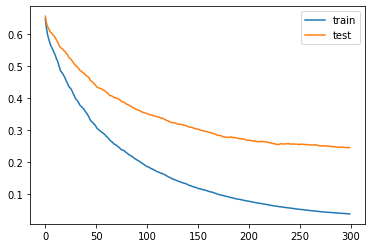

In [54]:
# retrieve performance metrics
results = optimized_xgboost.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

Text(0, 0.5, 'True positive rate (TPR)')

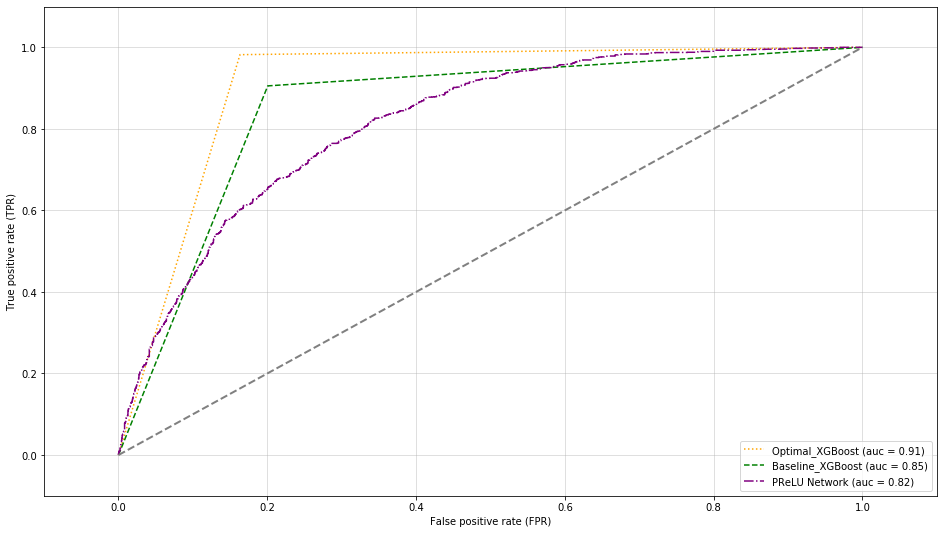

In [55]:
colors = ['orange', 'green','purple']
linestyles = [':', '--','dashdot']
all_clf = [optimized_xgboost, xgb_base, model_prelu]
clf_labels = ['Optimal_XGBoost','Baseline_XGBoost','PReLU Network']
plt.figure(figsize=(16,9))
for clf, label, clr, ls  in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    # assuming the label of the positive class is 1
    y_pred = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('images/07_04', dpi=300)